In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORT**

In [ ]:
import os.path as osp
import os
import requests
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

#renet50 model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

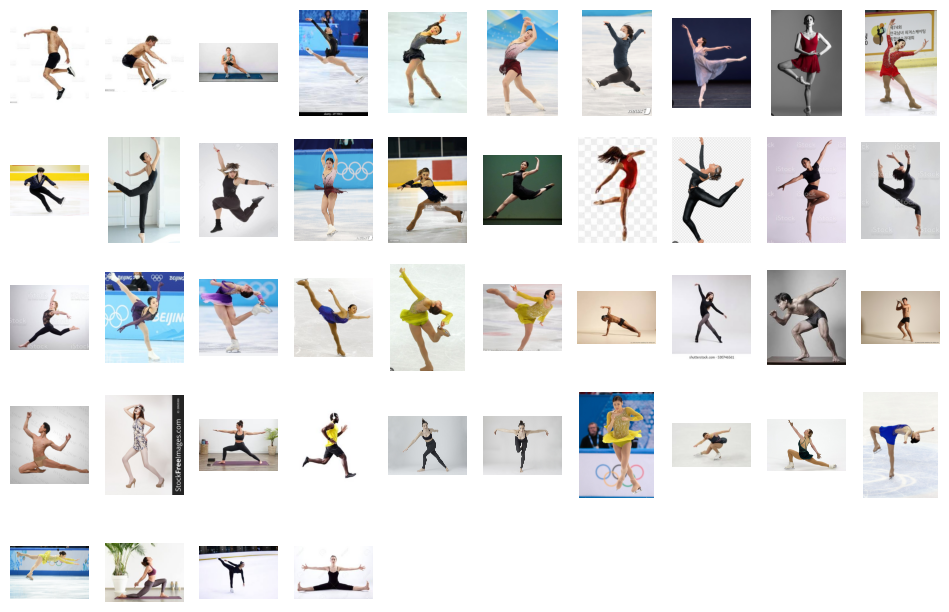

In [ ]:
image_folder = '/content/drive/MyDrive/인공지능팀플/data set 100'

image_files = os.listdir(image_folder)

images = []
for file_name in image_files:
    file_path = os.path.join(image_folder, file_name)
    image = cv2.imread(file_path)
    if image is not None:
        images.append(image)

plt.figure(figsize=(12, 8))
columns = 10  # 한 줄에 표시할 이미지 개수
rows = (len(images) // columns) + 1

# 이미지를 순회하면서 표시
for i, image in enumerate(images):
    plt.subplot(rows, columns, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # BGR을 RGB로 변환
    plt.axis('off')  # 축 제거

plt.show()

160.0 24.0
136.0 48.0
136.0 48.0
160.0 64.0
176.0 64.0
136.0 40.0
160.0 56.0
184.0 56.0
88.0 48.0
64.0 80.0
56.0 112.0
88.0 40.0
56.0 40.0
32.0 32.0
112.0 40.0


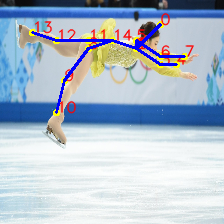

In [ ]:

BODY_PARTS = {"Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
              "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
              "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14,
              "Background": 15}


POSE_PAIRS = [["Head", "Neck"], ["Neck", "RShoulder"], ["RShoulder", "RElbow"],
              ["RElbow", "RWrist"], ["Neck", "LShoulder"], ["LShoulder", "LElbow"],
              ["LElbow", "LWrist"], ["Neck", "Chest"], ["Chest", "RHip"], ["RHip", "RKnee"],
              ["RKnee", "RAnkle"], ["Chest", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"]]

# setting network
protoFile='/content/drive/MyDrive/pose_deploy_linevec_faster_4_stages.prototxt'
weightsFile='/content/drive/MyDrive/pose_iter_160000.caffemodel'
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

image = cv2.imread('/content/drive/MyDrive/인공지능팀플/data set 100/image16.jpeg')
image = cv2.resize(image, (224, 224))

imageHeight, imageWidth, imageColor = image.shape

#이미지 전처리
inpBlob = cv2.dnn.blobFromImage(image, 1.0 / 255, (imageWidth, imageHeight), (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output=net.forward()

H = output.shape[2]
W = output.shape[3]


# points 이미지에 입력
points = []
for i in range(0, 15):
    probMap = output[0, i, :, :]


    #(9.076588321477175e-05, 0.27673089504241943, (17, 11), (10, 12))
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    # 원래 이미지에 맞게 점 위치 변경
    x = (imageWidth * point[0]) / W
    y = (imageHeight * point[1]) / H

    print(x,y)

    if prob > 0.1:
        cv2.circle(image, (int(x), int(y)), 3, (0, 255, 255), thickness=-1,
                   lineType=cv2.FILLED)  # circle(그릴곳, 원의 중심, 반지름, 색)
        cv2.putText(image, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1,
                    lineType=cv2.LINE_AA)
        points.append((int(x), int(y)))
    else:
        points.append(None)

# 관절들 선으로 연결
for pair in POSE_PAIRS:
    partA = pair[0]  # Head
    partA = BODY_PARTS[partA]  # 0
    partB = pair[1]  # Neck
    partB = BODY_PARTS[partB]  # 1

    # print(partA," 와 ", partB, " 연결\n")

    if points[partA] and points[partB]:
        cv2.line(image, points[partA], points[partB], (255, 0, 0), 2)


cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# renet50

#vgg model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

from tensorflow.keras.preprocessing import image

VGG_model = VGG16(weights='imagenet', include_top=False)

img_path = '/content/drive/MyDrive/yuna.jpeg'

(img size 224, 224)

img_pil = Image.open(img_path).resize((224, 224))

img = np.array(img_pil)

x = np.expand_dims(img, axis=0)

x = preprocess_input(x)

features = VGG_model.predict(x)

print(features.shape)

In [ ]:
ResNet_model = ResNet50(weights='imagenet', include_top=False)

img_path = '/content/drive/MyDrive/yuna.jpeg'

# 이미지 크기를 224x224로 조정
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(x.shape)

features = ResNet_model.predict(x)
print(features.shape)

(1, 224, 224, 3)
1/1 [==============================] - 1s 875ms/step
(1, 7, 7, 2048)


In [ ]:
filter_size = 3
pool_size = 2

CNN_model = Sequential([
  keras.Input(shape=(7,7,512)),

#1layer
  Conv2D(filters = 50, kernel_size = (3,3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Conv2D(filters = 50, kernel_size = (3,3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  MaxPooling2D(pool_size=pool_size),

#2layer
  Conv2D(filters = 50, kernel_size = (3,3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Conv2D(filters = 50, kernel_size = filter_size, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  MaxPooling2D(pool_size=pool_size),

  Flatten(),
  Dense(50),
  Activation('relu'),

  Dense(10),
  Activation('relu'),

  Dense(2),

])

CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7, 7, 50)          230450    
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 50)         200       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 7, 7, 50)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 50)          22550     
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 50)         200       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 7, 7, 50)          0

In [ ]:
checkpoint_filepath = "/content/drive/MyDrive/데기인팀플/checkpoint"
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)



CNN_model.compile(
  'adam',
  loss='mse', #회귀, losee=mse
  metrics=['accuracy'],
)



k= CNN_model.predict(features, verbose=0)
k=k[0]
predicted_x, predicted_y=k

print(predicted_x, predicted_y)

0.66513807 -1.8716452


21.2844181060791 59.89264678955078


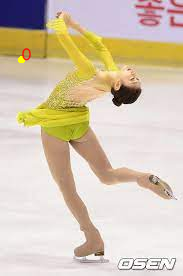

In [ ]:
import os.path as osp
import requests
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

input_size = (224, 224)
feature_map_size = (7, 7)

img_path = '/content/drive/MyDrive/yuna.jpeg'
img = cv2.imread(img_path)

x= (predicted_x * input_size[0] / feature_map_size[0])
y= (predicted_y * input_size[1] / feature_map_size[1])

print(x, y)

cv2.circle(img, (int(x), int(y)), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
cv2.putText(img, "{}".format(0), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, lineType=cv2.LINE_AA)
points.append((int(x), int(y)))

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()